<h1 style="font-size: 3rem; color: darkblue">Insertion Sort vs Merge Sort</h1>

# Introduzione
_Insertion Sort_ e _Merge Sort_ sono tra i principali __algoritmi di ordinamento__ utilizzati per ordinare una lista di elementi in ordine __crescente__ o __decrescente__.
_Insertion Sort_ ordina la lista __elemento per elemento__, ma diventa inefficiente con grandi quantità di dati. D'altra parte, il _Merge Sort_ è più efficiente grazie alla strategia __divide et impera__. Dividendo, ordinando e unendo le sotto-liste, riduce notevolmente il tempo di esecuzione, rendendolo ideale per ordinare grandi liste.

<h2 style="font-size: 2rem; color: #3437eb;">Insertion Sort</h2>

## Breve descrizione
_Insertion Sort_ è un algoritmo di ordinamento che costruisce una sequenza ordinata posizionando ciascun elemento nella sua giusta posizione, formando una parte ordinata e una parte non ordinata. Il funzionamento essenziale prevede di prendere un elemento alla volta e inserirlo nella posizione corretta confrontandolo con gli elementi già ordinati, mantenendo la sequenza ordinata in ogni momento. ordinati.




## Codice

In [6]:
def insertionSort(lista):
    # Iniziamo il ciclo dal secondo elemento (indice 1) poiché il primo elemento è già ordinato
    for j in range(1, len(lista)):
        chiave = lista[j]

        i = j - 1
        # Continuiamo a spostare la chiave indietro finché è più piccola dell'ultimo elemento nell'array
        while (i > -1) and chiave < lista[i]:
            lista[i + 1] = lista[i]
            i = i - 1
        lista[i + 1] = chiave
    return lista

### Esempio di utilizzo

In [10]:
lista = [12, 11, 13, 5, 6]
print("la lista originale è:", lista)
print("la lista ordinata è:", insertion_sort(lista))

la lista originale è: [12, 11, 13, 5, 6]
la lista ordinata è: [5, 6, 11, 12, 13]


## Tempo di Esecuzione
La __complessità computazionale__ dell'algoritmo di _Insertion Sort_ dipende principalmente dalla disposizione degli elementi nell'array da ordinare.
Nel _caso migliore_, la complessità dell'algoritmo di _Insertion Sort_ è **__O(n)__** per ordinare un array di _n_ elementi. Questo si verifica quando l'array è già __ordinato__, quindi l'algoritmo deve solo verificare se ogni elemento è maggiore o uguale al suo predecessore, richiedendo un solo confronto per ciascun elemento.
Nel _caso peggiore_ e anche nel _caso medio_, la complessità dell'_Insertion Sort_ è **__O(n^2)__**. Questo si verifica quando l'array è ordinato in __ordine inverso__ o in modo __casuale__, richiedendo confronti e scambi ripetuti per inserire ogni elemento nella posizione corretta all'interno della parte ordinata dell'array. 

<h2 style="font-size: 2rem; color: #3437eb;">Merge Sort</h2>

## Breve Descrizione
_Merge Sort_ è un efficiente algoritmo di ordinamento che adotta la strategia __Divide et impera__. Inizia dividendo la sequenza di _n_ elementi da ordinare in due sottosequenze di _n/2_ elementi ciascuna. Successivamente, ordina separatamente queste due sottosequenze utilizzando il metodo __merge sort__ in modo __ricorsivo__. Una volta che entrambe le sottosequenze sono ordinate, le combina in modo ordinato, unendo così le due metà ordinate per ottenere la sequenza complessivamente ordinata.

## Codice

In [8]:
def merge(sinistra,destra):
	i,j = 0,0
	risultato = []
    
	#scorri sia la sottolista sinistra che quella destra
	while i < len(sinistra) and j < len(destra):
		#se il valore nella sottolista sinistra è minore o uguale a quello nella sottolista destra, aggiungilo al risultato
		if sinistra[i] <= destra[j]:
			risultato.append(sinistra[i])
			i += 1
		else:
			#viceversa di prima
			risultato.append(destra[j])
			j += 1
            
	#concatena il resto della sottolista sinistra e destra
	risultato += sinistra[i:]
	risultato += destra[j:]

	return risultato

def merge_sort(lista):
	#se la lista contiene solo un elemento, restituiscila
	if len(lista) <= 1:
		return lista
	else:
		#suddividi la lista in due sottoliste e suddividile ricorsivamente
		medio = int(len(lista)/2)
		sottolista_sinistra = merge_sort(lista[:medio])
		sottolista_destra = merge_sort(lista[medio:])
        
		#restituisci la lista unita usando la funzione merge
		return merge(sottolista_sinistra,sottolista_destra)

### Esempio di utilizzo

In [2]:
lista = [3,1,5,3,2,5,8,2,9,6,12,53,75,22,83,123,12123]
print('la lista ordinata è: ', merge_sort(lista))

la lista ordinata è:  [1, 2, 2, 3, 3, 5, 5, 6, 8, 9, 12, 22, 53, 75, 83, 123, 12123]


## Tempo di Esecuzione

La _complessità computazionale_ di _Merge Sort_ è **O(nlogn)**, sia nel caso migliore che peggiore. La complessità è determinata principalmente dalla fase di __merge__, che richiede **O(n)** operazioni per unire due sottoarray ordinati. Poichè l'array viene diviso a metà in ogni passo, il numero totale di fusioni richieste è **O(logn)**.
Quindi, la _complessità computazionale_ totale di _Merge Sort_ è **O(nlogn)**, poiché in ogni livello della ricorsione abbiamo **O(n)** operazioni di merge e il numero totale di livelli della ricorsione è **O(logn)**.

# Testing

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


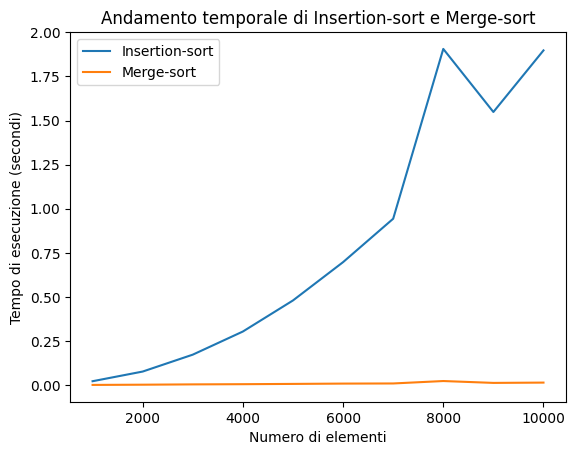

Secondo test...
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


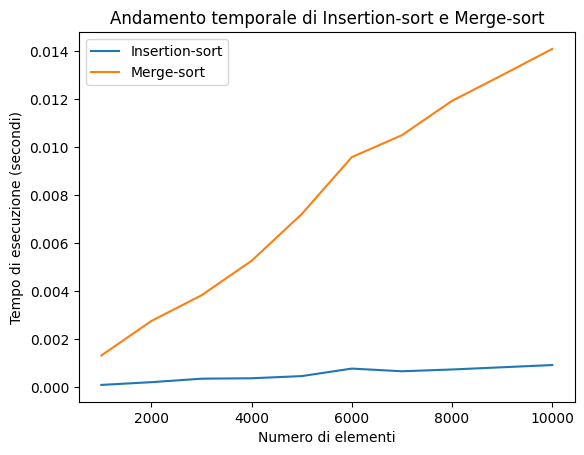

Terzo test...
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


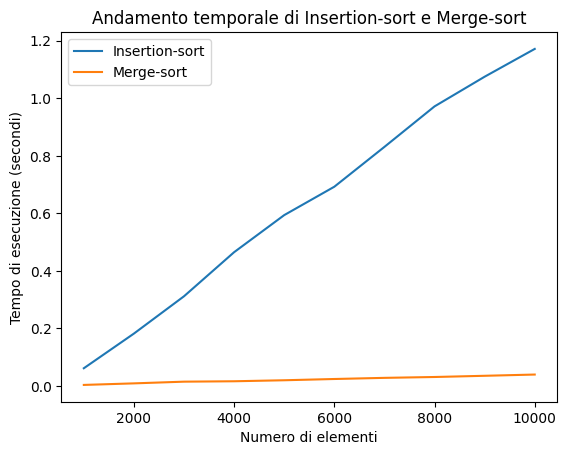

In [13]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.setrecursionlimit(10 ** 9)

def listaCasuale(num_elem):
    lista = list()
    for i in range(num_elem):
        lista.append(random.randint(0, num_elem * 10))
    return lista

def listaOrdinata(num_elem):
    lista = list()
    for i in range(num_elem):
        lista.append(i)
    return lista

def listaOrdinataCasualmente(num_elem):
    lista = np.arange(0, num_elem)
    #mescolo gli elementi in modo casuale
    np.random.shuffle(lista)
    return lista

def test(alg_lista, num_elem, iterazioni):
    dimensioni_lista = []
    insertion_sort_t = []
    merge_sort_t = []
    n = 0
    lista_max = alg_lista(num_elem * iterazioni)

    for i in range(iterazioni):
        n = num_elem * (i + 1)
        dimensioni_lista.append(n)
        print(n)
        lista = lista_max[:n]
        copia_lista = lista.copy()
        start = timer()
        insertionSort(lista)
        stop = timer()
        insertion_sort_t.append((stop - start))
        start = timer()
        merge_sort(lista)
        stop = timer()
        merge_sort_t.append((stop - start))

    plt.plot(dimensioni_lista, insertion_sort_t, label='Insertion-sort')
    plt.plot(dimensioni_lista, merge_sort_t, label='Merge-sort')
    plt.xlabel('Numero di elementi')
    plt.ylabel('Tempo di esecuzione (secondi)')
    plt.title('Andamento temporale di Insertion-sort e Merge-sort')
    plt.legend()
    plt.show()

def main():
    num_elem = 1000;
    iterazioni = 10;
    test(listaCasuale, num_elem, iterazioni)
    print('Secondo test...')
    test(listaOrdinata, num_elem, iterazioni)
    print('Terzo test...')
    test(listaOrdinataCasualmente, num_elem, iterazioni)
    
main()

Si vanno ad eseguire 3 test in sequenza:
* Nel primo caso passo in input ai due algoritmi una lista di elementi presi in modo __random__, aumentando il _range_ dei possibili valori moltiplicando per 10 il _numero di elementi_ della lista
* Nel secondo caso invece passeremo come input una lista di elementi __già ordinata__ (in ordine crescente).
* Nel l'ultimo caso invece prendiamo una lista con elementi in ordine crescente da 0 a *num_elementi*, e tramite la funzione ___shuffle___ della libreria _numpy_, diamo un __ordine casuale__ agli elementi della lista.

## Conclusioni e commenti


Nel contesto dell'ordinamento di insiemi di dati, si osserva che l'Insertion Sort si dimostra particolarmente efficiente quando applicato a liste già ordinate, raggiungendo una complessità ottimale di 
O(n) nel caso migliore. D'altro canto, il Merge Sort, con la sua complessità costante 
O(nlogn), risulta una scelta più versatile ed efficiente per ordinare liste di qualsiasi ordine, garantendo prestazioni ottimali indipendentemente dalle condizioni iniziali.